In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\alex\\Desktop\\Project 9- Virtual world Data Analysis\\dataverse_files\\csv")

In [3]:
y=pd.read_table('transactions.csv',sep=";",header=None,usecols=(0,1,2,3))
print("Total rows: {0}".format(len(y)))

Total rows: 538597


In [4]:
y

,0,1,2,3
0,2007-10-28 14:53:04,16485,16486,44
1,2007-10-28 15:04:00,16485,16486,50
2,2007-10-28 15:04:41,16485,16486,25
3,2007-10-28 15:06:05,16485,16486,100
4,2007-10-28 15:08:37,16486,16485,33
5,2007-10-28 15:19:16,16485,16486,6
6,2007-10-28 15:21:24,16485,16486,66
7,2007-10-28 15:22:10,16485,16486,66
8,2007-10-28 15:22:22,16485,16492,44
9,2007-10-28 15:23:17,16485,16486,66


In [5]:
G=nx.from_pandas_dataframe(y,source=1, target=2,edge_attr=True)

In [6]:
print(G.order())
print(G.size())

112130
331547


In [7]:
s = pd.Series(pd.date_range('2007-10-28 00:00:00','2012-10-04 00:00:00',freq='1M'))

In [8]:
s[59]

Timestamp('2012-09-30 00:00:00')

In [9]:
y[0]=y[0].as_matrix() 

In [10]:
y[0]= pd.to_datetime(y[0])

In [11]:
Time=[]
for i in range(59):
    Time.append(y.loc[(y[0]>=s[i])&(y[0]<s[i+1])])

In [12]:
X=[]
for i in range(59):
    X.append(nx.from_pandas_dataframe(Time[i],source=1, target=2,edge_attr=True,create_using=nx.DiGraph()))

In [13]:
for i in range(59):
    print(X[i].order(),X[i].size(),s[i],s[i+1])

316 315 2007-10-31 00:00:00 2007-11-30 00:00:00
2236 3846 2007-11-30 00:00:00 2007-12-31 00:00:00
2856 4690 2007-12-31 00:00:00 2008-01-31 00:00:00
3240 7127 2008-01-31 00:00:00 2008-02-29 00:00:00
5043 11233 2008-02-29 00:00:00 2008-03-31 00:00:00
5961 12948 2008-03-31 00:00:00 2008-04-30 00:00:00
7994 15951 2008-04-30 00:00:00 2008-05-31 00:00:00
8787 18313 2008-05-31 00:00:00 2008-06-30 00:00:00
9515 22266 2008-06-30 00:00:00 2008-07-31 00:00:00
10503 24268 2008-07-31 00:00:00 2008-08-31 00:00:00
7067 12180 2008-08-31 00:00:00 2008-09-30 00:00:00
6636 11220 2008-09-30 00:00:00 2008-10-31 00:00:00
6928 11275 2008-10-31 00:00:00 2008-11-30 00:00:00
6568 10856 2008-11-30 00:00:00 2008-12-31 00:00:00
6666 11390 2008-12-31 00:00:00 2009-01-31 00:00:00
6328 10323 2009-01-31 00:00:00 2009-02-28 00:00:00
6709 11211 2009-02-28 00:00:00 2009-03-31 00:00:00
6164 10113 2009-03-31 00:00:00 2009-04-30 00:00:00
5521 8315 2009-04-30 00:00:00 2009-05-31 00:00:00
6987 10829 2009-05-31 00:00:00 2009-0

In [14]:
s[51]

Timestamp('2012-01-31 00:00:00')

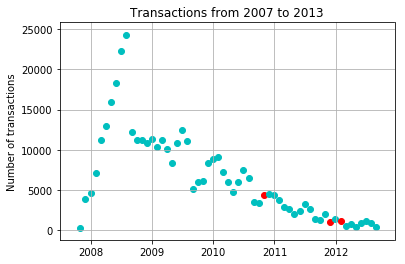

In [15]:
for i in range(59):
    if((i==36)|(i==49)|(i==51)):
        plt.scatter(s[i],X[i].size(),c='r')
    else:
        plt.scatter(s[i],X[i].size(),c='c')
plt.grid()
plt.ylabel('Number of transactions')
plt.title('Transactions from 2007 to 2013')
plt.savefig('trans1.png')
plt.show()

In [16]:
Y=[]
for node in G:
    d = G.degree(node)
    Y.append([node,d])
    
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:10]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers with most transactions: ")
print(L)

[[16453, 13087], [509053, 2164], [201168, 805], [153248, 655], [1298548, 602], [124836, 559], [374805, 556], [371461, 526], [340968, 439], [847509, 428]]

Users with most transactions: 
[16453, 509053, 201168, 153248, 1298548, 124836, 374805, 371461, 340968, 847509]


In [17]:
print("\nTransactions for user number 16453: ")
p=y.loc[((y[1] == 16453)|(y[2] == 16453))]
print("Total Transactions: {0}".format(len(p)))
print(p)


Transactions for user number 16453: 
Total Transactions: 32651
                         0        1        2    3
494    2007-11-30 18:43:48    16453    16759   10
510    2007-11-30 21:00:47    99245    16453    7
563    2007-12-01 13:02:24    16453    99245  270
585    2007-12-01 17:08:20    63392    16453   33
948    2007-12-04 14:59:06    44974    16453    8
949    2007-12-04 14:59:09    44974    16453    8
983    2007-12-04 17:52:06    50716    16453    1
1026   2007-12-04 21:54:28   131607    16453    5
1151   2007-12-05 16:53:51    35384    16453    3
1268   2007-12-06 13:20:47    17665    16453  400
1269   2007-12-06 13:20:48    17665    16453  400
1313   2007-12-06 15:45:17   124836    16453    5
1347   2007-12-06 17:57:10    32862    16453    3
1417   2007-12-06 21:36:57    89903    16453    3
1439   2007-12-07 10:08:06    16453    39547   30
1440   2007-12-07 10:08:26    16453   113968   30
1441   2007-12-07 10:08:47    16453    67372   30
1442   2007-12-07 10:09:22    16453 

In [18]:
s1 = pd.Series(pd.date_range('2007-11-30 18:43:48','2012-03-22 16:07:07',freq='1M'))

In [19]:
T1=[]
for i in range(50):
    T1.append(p.loc[(p[0]>=s1[i])&(p[0]<s1[i+1])])

In [20]:
X1=[]
for i in range(50):
    X1.append(nx.from_pandas_dataframe(T1[i],source=1, target=2,edge_attr=True))

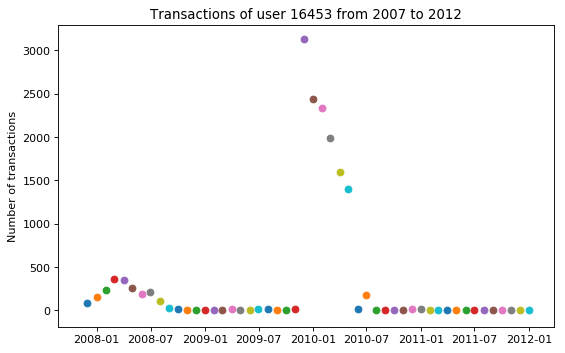

In [21]:
plt.figure(figsize=(8,5), dpi=80)
for i in range(50):
    plt.scatter(s1[i],X1[i].size())
plt.ylabel('Number of transactions')
plt.title('Transactions of user 16453 from 2007 to 2012')
plt.savefig('trans2.png')
plt.show()